## Setup environment

In [1]:
import matplotlib.pyplot as plt

from simulators.grid_world.grid_world import Maze, simulate_policy, set_granular_reward, set_normilized_reward, divide_reward_by
from simulators.grid_world import HORIZON

grid_type = "simple"
feature_type = "one_hot"
dimensions = 124

# feature_type = "simularity"
# dimensions = 100
sigma = 0.25

env = Maze(grid_type, feature_type, dimensions=dimensions, sigma=sigma)

## Expert policy

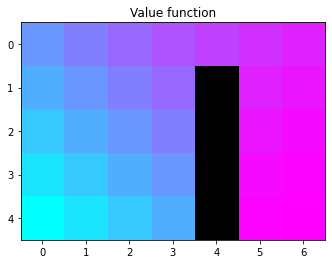

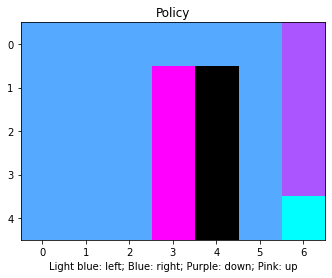

In [5]:
from algorithms.VI_dynamic_programming import value_iteration

expert_Q, expert_policy = value_iteration(env.P, env.R, env.gamma)

# Uncomment if you want to simulate the policy
# simulate_policy(expert_policy, f"../../videos/grid_world/{grid_type}_expert.mp4", env, HORIZON)

env.display_value_function(expert_Q)
env.display_policy(expert_Q)

### Change reward to granular setting

In [4]:
env = set_granular_reward(env, expert_policy)
env = set_normilized_reward(env)
env = divide_reward_by(env, 10)

## LSPI

! Warning ! Stopped before convergence
Grad norm 0.009734148569012627


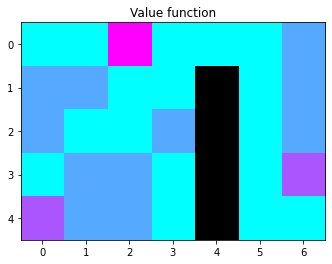

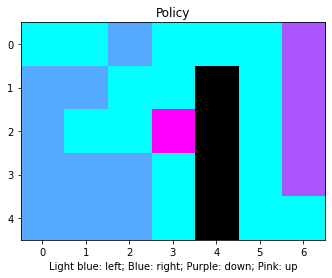

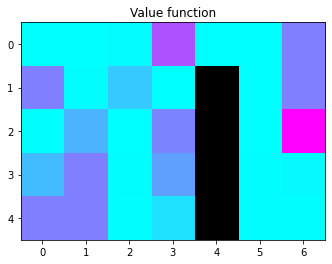

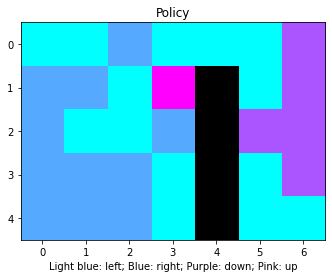

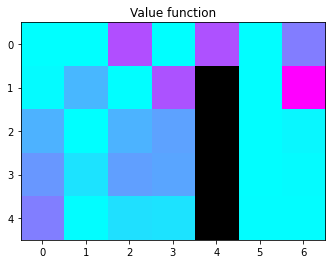

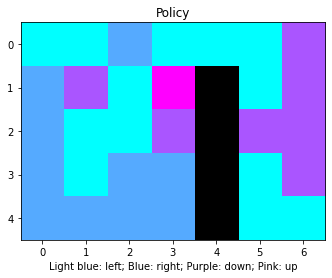

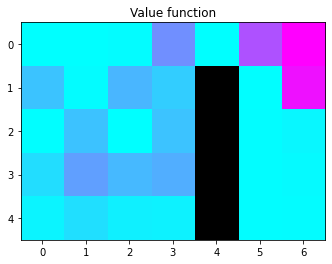

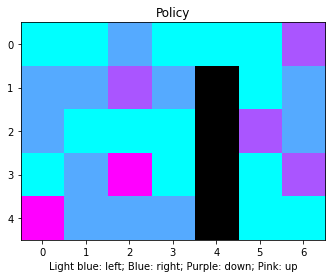

KeyboardInterrupt: 

In [8]:
from algorithms.API.lstd import lstd_grid_word

n_expert_samples = 20
n_rl_samples = 100
regularisor = 0.0001
regularisor_bellmann = 0.0001
max_iteration = 10
epsilon_decay_limit = 0.05
regularisor_expert = 0.1
expert_loss_name = "penalizer"
show_args = {"show_policy":True, "show_value_function": True, "show_statistics": False}

lstd_Q, lstd_policy, buffer = lstd_grid_word(
    env,
    n_expert_samples,
    n_rl_samples,
    regularisor,
    regularisor_bellmann,
    max_iteration,
    epsilon_decay_limit,
    regularisor_expert,
    expert_loss_name,
    **show_args
)